In [1]:
#Importing basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [93]:
#Importing training data
df = pd.read_csv('Data\dataset_treino.csv')

In [94]:
#First glimpse in the data
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### On the first look it appears tha we don't have NA values, however, there are a lot of inconsistent values like 'pressao_sanguinea' or 'bmi' minimum as 0.
### It's safe to assume that the NA values was record in the data base as 0 but not all 0s can be assume as NA values, like 'num_gestacoes', that a 0 is a very possible value.

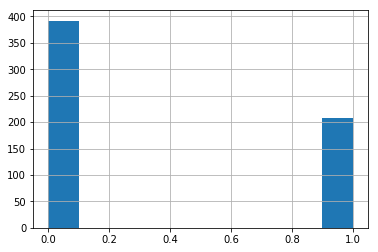

In [95]:
#Distribution of class
df['classe'].hist()

### A bit unbalanced

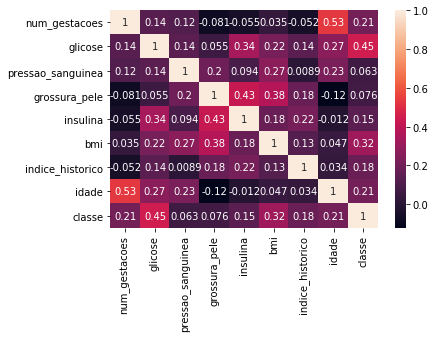

In [96]:
#Geting some correlations to find what parameter to start
sns.heatmap(df.drop('id', axis=1).corr(), annot=True)

### It seems that 'glicose' has the most powerfull possibility to explain 'classe'. We'll start here.

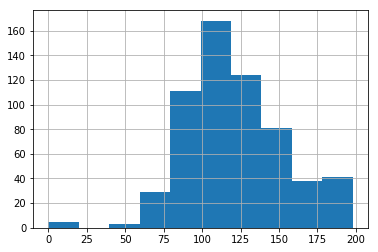

In [97]:
df['glicose'].hist()

In [98]:
#Getting rid of inconsistet values
meanGlicose = df[df['glicose'] > 20]['glicose'].mean()
df['glicose'] = [meanGlicose if x < 20 else x for x in df['glicose']]

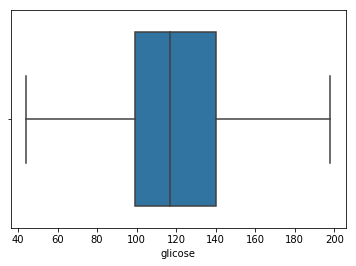

In [99]:
#Searching for outliers
sns.boxplot(df['glicose'])

### We got ourselves a clean attribute. Let's run some tests :)

In [100]:
x = df[['glicose']]
y = df['classe']

In [101]:
#Spliting the data in train/test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [102]:
#Predicting with a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model1 = lr.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.7333333333333333

### Not bad at all to start with
### Let's try differents models

In [103]:
#Trying KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model2 = knn.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7222222222222222

In [104]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 50)
model3 = rfc.fit(xtrain,ytrain)
model3.score(xtest,ytest)

0.7055555555555556

In [105]:
#SVM
from sklearn.svm import SVC
svm = SVC()
model4 = svm.fit(xtrain,ytrain)
model4.score(xtest,ytest)

0.7222222222222222

### Let's add more data.
### The 'bmi' attribute seems the next natural step. Let's take a closer look.

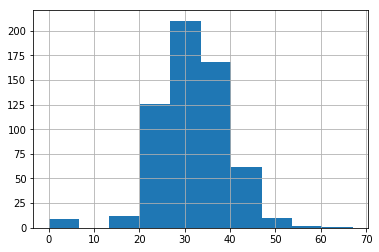

In [106]:
df['bmi'].hist()

In [107]:
#Getting rid of inconsistet values again
meanbmi = df[df['bmi'] > 10]['bmi'].mean()
df['bmi'] = [meanbmi if x < 10 else x for x in df['bmi']]

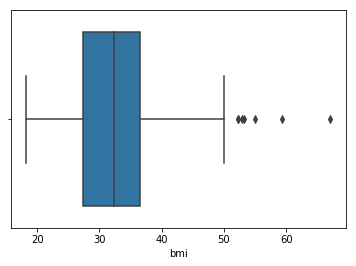

In [108]:
#Searching outliers
sns.boxplot(df['bmi'])

In [109]:
#How many of then we got?
len(df[df['bmi'] > 50])

7

In [110]:
#Let's try clean than out
df['bmi'] = df[df['bmi'] < 50]['bmi']
df.dropna(inplace=True)

### Let's run more tests but this time, we will normalize the 'x' and create a function that test all the model we want at once.

In [111]:
def tests(data):
    model1 = lr.fit(xtrain,ytrain)
    model2 = knn.fit(xtrain,ytrain)
    model3 = rfc.fit(xtrain,ytrain)
    model4 = svm.fit(xtrain,ytrain)
    print('Logistic Regression Score: ' + str(model1.score(xtest,ytest)))
    print('Knn Score: ' + str(model2.score(xtest,ytest)))
    print('Random Forest Score: ' + str(model3.score(xtest,ytest)))
    print('SVM Score: ' + str(model3.score(xtest,ytest)))

In [112]:
x = df[['glicose', 'bmi']]
y = df['classe']

In [113]:
from sklearn.preprocessing import scale, StandardScaler, minmax_scale
scale = StandardScaler()
x = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [114]:
tests(df)

Logistic Regression Score: 0.7191011235955056
Knn Score: 0.7191011235955056
Random Forest Score: 0.7415730337078652
SVM Score: 0.7415730337078652


### It appears that 'bmi' doesen't help for now. Let's try a differet one.
### 'num_gestacoes' and 'idade' has the same correlation index with 'classe' and a strong one with each other.
### It indicates that use both in the model could be dangerous.
### Let's make some cleaning and try to find out wich one to use

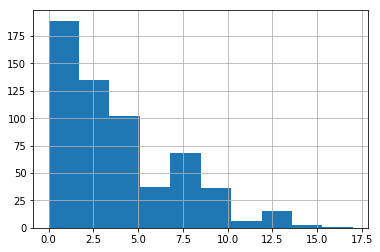

In [115]:
df['num_gestacoes'].hist()

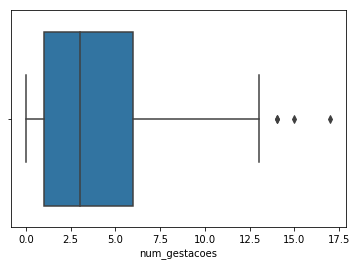

In [116]:
sns.boxplot(df['num_gestacoes'])

In [117]:
len(df[df['num_gestacoes'] > 12])

11

In [118]:
#Cleaning out outliers
df['num_gestacoes'] = df[df['num_gestacoes'] < 13]['num_gestacoes']
df.dropna(inplace=True)

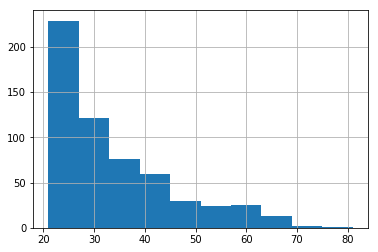

In [119]:
df['idade'].hist()

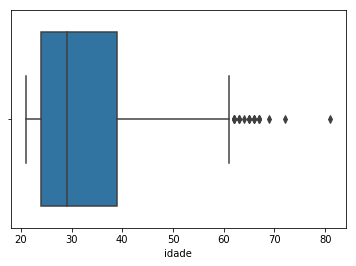

In [120]:
sns.boxplot(df['idade'])

In [121]:
len(df[df['idade'] > 63])

13

In [122]:
#Cleaning out outliers
df['idade'] = df[df['idade'] < 64]['idade']
df.dropna(inplace=True)

In [123]:
x = df[['glicose', 'idade']]
y = df['classe']

In [124]:
x = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [125]:
tests(df)

Logistic Regression Score: 0.7660818713450293
Knn Score: 0.7134502923976608
Random Forest Score: 0.7368421052631579
SVM Score: 0.7368421052631579


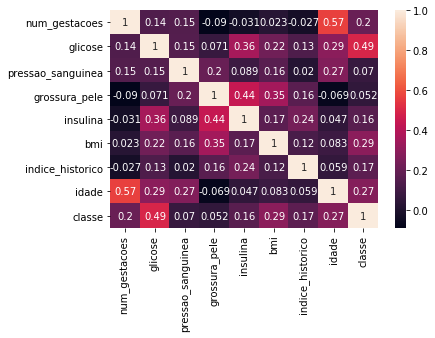

In [126]:
sns.heatmap(df.drop('id', axis=1).corr(), annot=True)

### After cleaning out some outliers, 'idade' seems to conserve more correlation with 'classe'.
### Let's try combinig what we got so far.

In [127]:
x = df[['glicose', 'idade', 'bmi']]
y = df['classe']

In [128]:
from sklearn.preprocessing import scale, StandardScaler, minmax_scale
scale = StandardScaler()
x = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [129]:
tests(df)

Logistic Regression Score: 0.7894736842105263
Knn Score: 0.7251461988304093
Random Forest Score: 0.7309941520467836
SVM Score: 0.7309941520467836


### Looks we are getting somewhere.
### Let's find out if there are some more parameters with relevant correlation to add and than start tunning the hyperparameters

### 'insulina' could be a candidate but have a strong correlation with 'glicose', better leave it out.
### Let's look a little better to 'indice_historico'

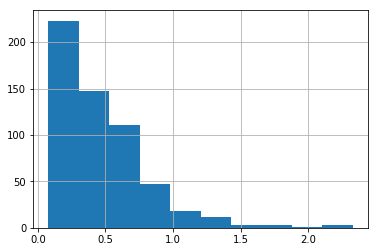

In [130]:
df['indice_historico'].hist()

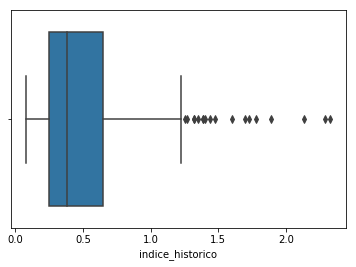

In [131]:
sns.boxplot(df['indice_historico'])

In [132]:
len(df[df['indice_historico'] > 1.3])

16

In [80]:
#df['indice_historico'] = df[df['indice_historico'] < 1.2]['indice_historico']
#df.dropna(inplace=True)

### And test

In [133]:
x = df[['glicose', 'idade', 'bmi', 'indice_historico']]
y = df['classe']

In [134]:
from sklearn.preprocessing import scale, StandardScaler, minmax_scale
scale = StandardScaler()
x = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [135]:
tests(df)

Logistic Regression Score: 0.7602339181286549
Knn Score: 0.7251461988304093
Random Forest Score: 0.7426900584795322
SVM Score: 0.7426900584795322


### not good

In [136]:
x = df[['glicose', 'idade', 'bmi']]
y = df['classe']

In [137]:
from sklearn.preprocessing import scale, StandardScaler, minmax_scale
scale = StandardScaler()
x = scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .3, random_state = 666)

In [138]:
tests(df)

Logistic Regression Score: 0.7894736842105263
Knn Score: 0.7251461988304093
Random Forest Score: 0.7076023391812866
SVM Score: 0.7076023391812866


### It seems that what make the model worst was cleaning out the outliers in 'indice_histórico'.
### I will leave the commented code only to keep the line of thinking and i will reload and run all the code so far.
### Then, I will try the model without cleaning the outliers. If don't improve, I will cut off the atribute.

### That's it, 'indice_historico' is out!

### Now, let's try some hyperparameters tunning with randomized grid Search

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
lrGrid = {'C' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9]}
rslr = RandomizedSearchCV(lr, lrGrid, cv = 6, n_iter=100)
rslr.fit(x,y)
print("Best: %f using %s" % (rslr.best_score_, rslr.best_params_))

Best: 0.767606 using {'C': 0.1}


In [141]:
knnGrid = {'n_neighbors' : range(1,20)}
rsknn = RandomizedSearchCV(knn, knnGrid, cv = 6, n_iter=100)
rsknn.fit(x,y)
print("Best: %f using %s" % (rsknn.best_score_, rsknn.best_params_))

Best: 0.758803 using {'n_neighbors': 9}


C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [142]:
rfcGrid = {'n_estimators' :range(100,200) ,
        'max_depth' : range(1, 40),
        'min_samples_split': range(2, 40),
        'min_samples_leaf' : range(2, 40)}
rsrfc = RandomizedSearchCV(rfc, rfcGrid, cv = 6, n_iter=100)
rsrfc.fit(x,y)
print("Best: %f using %s" % (rsrfc.best_score_, rsrfc.best_params_))

Best: 0.783451 using {'n_estimators': 179, 'min_samples_split': 39, 'min_samples_leaf': 13, 'max_depth': 10}


C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
svmGrid = {'C' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9],
          'gamma' : [0.001, 0.01, 0.1, 1, 1.1, 1.3, 1.5, 1.7, 1.9],
          'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
rssvm = RandomizedSearchCV(svm, svmGrid, cv = 6, n_iter=100)
rssvm.fit(x,y)
print("Best: %f using %s" % (rssvm.best_score_, rssvm.best_params_))

Best: 0.769366 using {'kernel': 'rbf', 'gamma': 0.01, 'C': 1.5}


### Not happy with the result but this notebook is already big.
### I will make anothet one trying diferent aproachs.
### Maybe I need to be a little more careful with outliers values.